In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [157]:
train=pd.read_csv('Training_data.csv')
test=pd.read_csv('Test Data.csv')

In [158]:
print train.head(20)
test.head()

    Serial        date  time of year  Year  Hour  Day off  Weekday  \
0        1  01-01-2011             1     0     0        0        6   
1        2  01-01-2011             1     0     1        0        6   
2        3  01-01-2011             1     0     3        0        6   
3        4  01-01-2011             1     0     4        0        6   
4        5  01-01-2011             1     0     6        0        6   
5        6  01-01-2011             1     0     7        0        6   
6        7  01-01-2011             1     0    11        0        6   
7        8  01-01-2011             1     0    15        0        6   
8        9  01-01-2011             1     0    17        0        6   
9       10  01-01-2011             1     0    21        0        6   
10      11  01-01-2011             1     0    23        0        6   
11      12  02-01-2011             1     0     0        0        0   
12      13  02-01-2011             1     0     3        0        0   
13      14  02-01-20

,Serial,date,time of year,Year,Hour,Day off,Weekday,Workingday,Weather,Temp,Feel_Temp,Humidity,Fog Density
0,1,01-03-2012,1,1,0,0,4,1,2,0.42,0.4242,1.002583,0.94
1,2,01-03-2012,1,1,1,0,4,1,3,0.46,0.4545,1.029196,0.94
2,3,01-03-2012,1,1,3,0,4,1,1,0.46,0.4545,1.043232,0.94
3,4,01-03-2012,1,1,4,0,4,1,1,0.48,0.4697,1.067031,0.88
4,5,01-03-2012,1,1,7,0,4,1,2,0.44,0.4394,1.097947,0.94


In [159]:
train.isnull().sum()

Serial            0
date              0
time of year      0
Year              0
Hour              0
Day off           0
Weekday           0
Workingday        0
Weather           0
Temp              0
Feel_Temp         0
 Humidity         0
Fog Density       0
Foreigners        0
Local             0
Total Visitors    0
dtype: int64

In [160]:
train[train.date=='01-03-2011'].head(10)

,Serial,date,time of year,Year,Hour,Day off,Weekday,Workingday,Weather,Temp,Feel_Temp,Humidity,Fog Density,Foreigners,Local,Total Visitors
772,773,01-03-2011,1,0,0,0,2,1,1,0.30,0.2727,0.642758,0.70,0,7,7
773,774,01-03-2011,1,0,1,0,2,1,1,0.26,0.2273,0.616315,0.70,0,3,3
774,775,01-03-2011,1,0,3,0,2,1,1,0.22,0.2121,0.595699,0.69,0,2,2
775,776,01-03-2011,1,0,5,0,2,1,1,0.20,0.1818,0.544208,0.64,1,1,2
776,777,01-03-2011,1,0,7,0,2,1,1,0.20,0.1818,0.560470,0.59,2,105,107
777,778,01-03-2011,1,0,8,0,2,1,1,0.20,0.1818,0.536369,0.59,10,204,214
778,779,01-03-2011,1,0,9,0,2,1,1,0.22,0.1970,0.486762,0.55,8,116,124
779,780,01-03-2011,1,0,11,0,2,1,1,0.28,0.2727,0.585175,0.45,8,48,56
780,781,01-03-2011,1,0,13,0,2,1,1,0.32,0.3485,0.687147,0.39,13,65,78
781,782,01-03-2011,1,0,15,0,2,1,1,0.34,0.3636,0.770567,0.34,7,57,64


In [161]:
main_train=train.drop(['date', 'Serial'], axis=1)
test=test.drop('date', axis=1)
test=test.drop('Serial', axis=1)
main_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 14 columns):
time of year      6061 non-null int64
Year              6061 non-null int64
Hour              6061 non-null int64
Day off           6061 non-null int64
Weekday           6061 non-null int64
Workingday        6061 non-null int64
Weather           6061 non-null int64
Temp              6061 non-null float64
Feel_Temp         6061 non-null float64
 Humidity         6061 non-null float64
Fog Density       6061 non-null float64
Foreigners        6061 non-null int64
Local             6061 non-null int64
Total Visitors    6061 non-null int64
dtypes: float64(4), int64(10)
memory usage: 663.0 KB


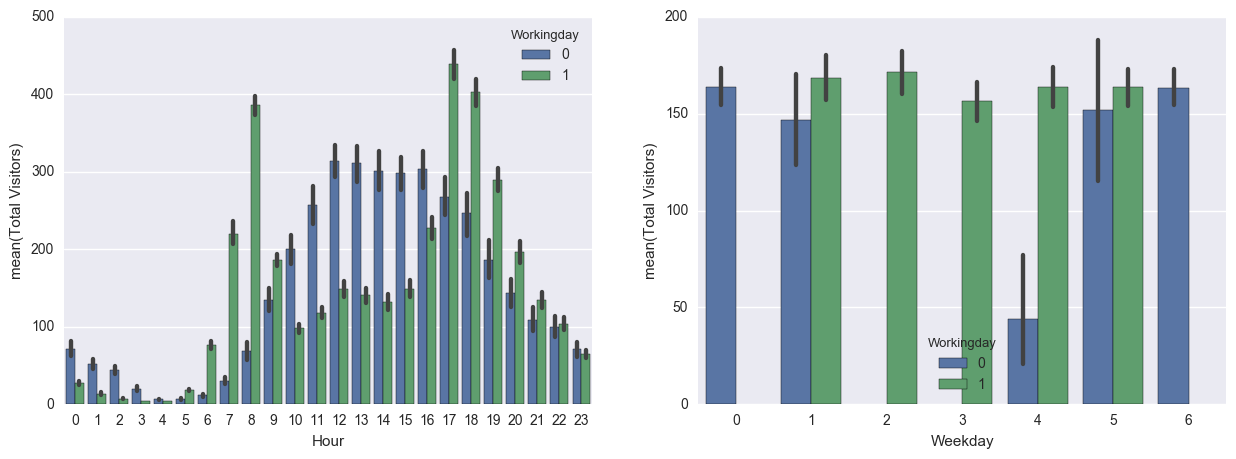

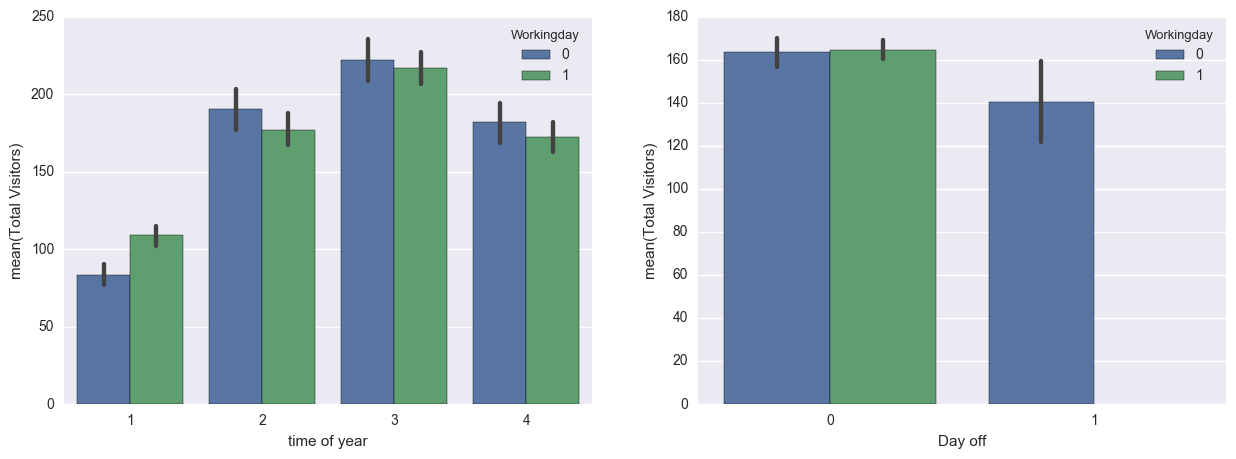

In [162]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sb.barplot(x='Hour', y='Total Visitors', data=main_train, hue='Workingday', ax=ax1)
sb.barplot(x='Weekday', y='Total Visitors', data=main_train, hue='Workingday', ax=ax2)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sb.barplot(x='time of year', y='Total Visitors', data=main_train, hue='Workingday', ax=ax1)
sb.barplot(x='Day off', y='Total Visitors', data=main_train, hue='Workingday', ax=ax2)

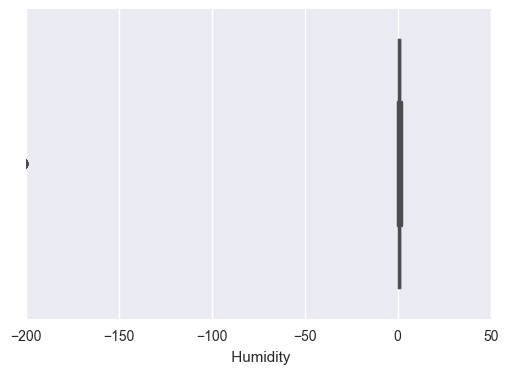

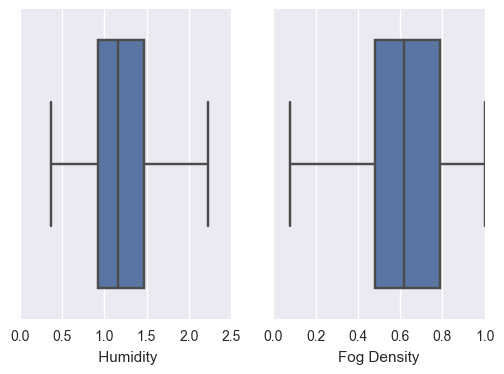

In [163]:
main_train['slot']=0
main_train.loc[main_train['Hour']<7, 'slot']=1
main_train.loc[(main_train['Hour']>6) & (main_train['Hour']<11), 'slot']=2
main_train.loc[(main_train['Hour']>10) & (main_train['Hour']<17), 'slot']=3
main_train.loc[(main_train['Hour']>16) & (main_train['Hour']<21), 'slot']=4
main_train.loc[(main_train['Hour']>20) & (main_train['Hour']<25), 'slot']=4

sb.boxplot(main_train[' Humidity'],)
main_train=main_train.loc[main_train[' Humidity']>-100]
main_train=main_train.loc[main_train['Fog Density']>0.03]

fig, (ax1, ax2)=plt.subplots(1,2)
sb.boxplot(main_train[' Humidity'], ax=ax1)
sb.boxplot(main_train['Fog Density'], ax=ax2)

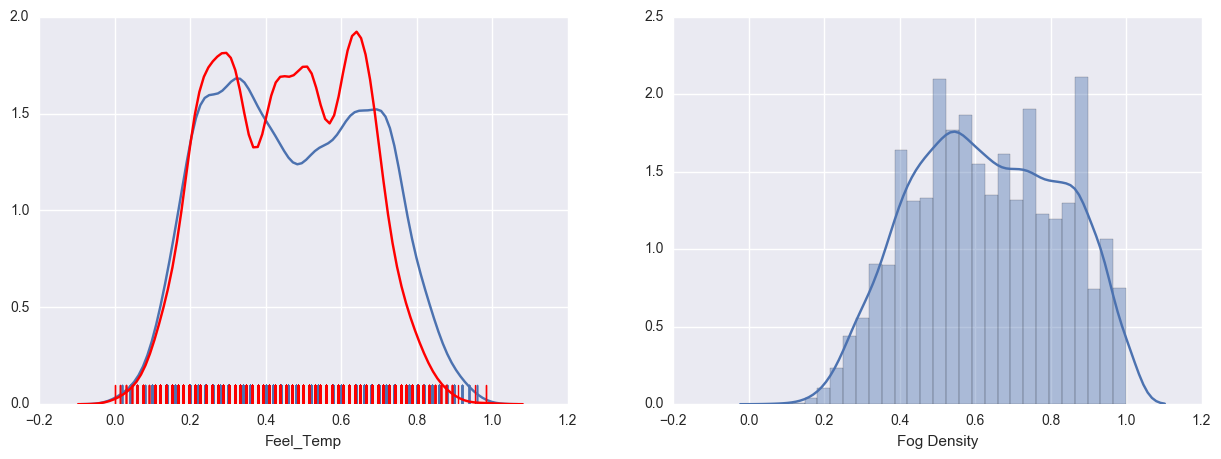

In [164]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sb.distplot(main_train['Temp'],rug=True, ax=ax1, kde=True, hist=False,)
sb.distplot(main_train['Feel_Temp'], color='red', rug=True, ax=ax1, kde=True, hist=False)
sb.distplot(main_train['Fog Density'], ax=ax2, hist=True)


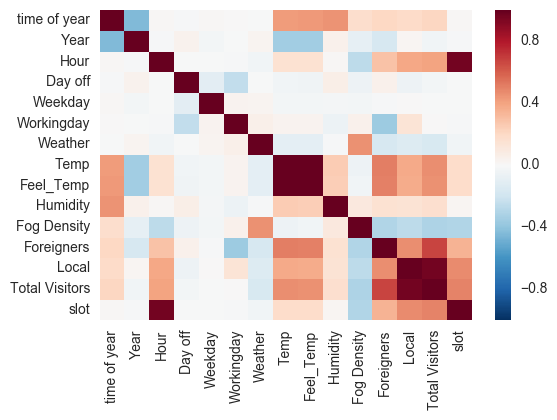

In [165]:
corr = main_train.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [166]:
main_train['temp_cat']=0
main_train['Humidity_cat']=0
'''def to_cat(x,y,z):
    c=0   
    for i in xrange(10):
        x.loc[(y>i/10)&(y<i/10), z]=i
'''
def to_cat(x, y):
    c=0   
    for i in xrange(-1,25):
        main_train.loc[(x>float(i)/float(10))&(x<float(i+1)/float(10)), y]=i

to_cat(main_train['Feel_Temp'], 'temp_cat')
to_cat(main_train[' Humidity'], 'Humidity_cat')
main_train.head(10)

,time of year,Year,Hour,Day off,Weekday,Workingday,Weather,Temp,Feel_Temp,Humidity,Fog Density,Foreigners,Local,Total Visitors,slot,temp_cat,Humidity_cat
0,1,0,0,0,6,0,1,0.24,0.2879,0.757754,0.81,3,13,16,1,2,7
1,1,0,1,0,6,0,1,0.22,0.2727,0.725487,0.80,8,32,40,1,2,7
2,1,0,3,0,6,0,1,0.24,0.2879,0.750239,0.75,3,10,13,1,2,7
3,1,0,4,0,6,0,1,0.24,0.2879,0.786713,0.75,0,1,1,1,2,7
4,1,0,6,0,6,0,1,0.22,0.2727,0.788794,0.80,2,0,2,1,2,7
5,1,0,7,0,6,0,1,0.20,0.2576,0.784772,0.86,1,2,3,2,2,7
6,1,0,11,0,6,0,1,0.36,0.3333,0.760312,0.81,26,30,56,3,3,7
7,1,0,15,0,6,0,2,0.44,0.4394,0.770238,0.77,40,70,110,3,4,7
8,1,0,17,0,6,0,2,0.44,0.4394,0.764819,0.82,15,52,67,4,4,7
9,1,0,21,0,6,0,2,0.40,0.4091,0.751657,0.87,3,31,34,4,4,7


In [176]:
from sklearn.cross_validation import train_test_split

dic=list(main_train.columns)
#stop_words=['Serial', 'Temp', ' Humidity', 'Feel_Temp', 'Foreigners', 'Local', 'Total Visitors']
stop_words=['Serial', 'temp_cat', 'Humidity_cat','Total Visitors', 'Foreigners', 'Local','Total Visitors','slot']

final_par=[ word for word in dic if word not in stop_words]

X_train,X_test, Y_train, Y_test=train_test_split(main_train[final_par], main_train['Total Visitors'], test_size=0.25, random_state=42)

In [168]:
from sklearn.metrics import accuracy_score
import math
def costcal(prediction, Y_test, name):
    cost=(prediction-Y_test)
    cost.as_matrix()
    cost=sum(cost*cost) 
    cost=np.sqrt(cost)
    print cost
    
    print ('for {0} it is {1}'.format(name, cost))
    

In [188]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=10).fit(X_train, Y_train)
prediction=model.predict(X_test)
(prediction)

costcal(prediction, Y_test, 'RandomForest')

1595.00942003
for RandomForest it is 1595.00942003


In [182]:
from sklearn import tree
model=tree.DecisionTreeRegressor().fit(X_train, Y_train)
prediction=model.predict(X_test)
costcal(prediction, Y_test, 'DecisionTree')

1990.79707655
for DecisionTree it is 1990.79707655


In [183]:
from sklearn import svm
model=svm.SVR().fit(X_train, Y_train)
prediction=model.predict(X_test)
costcal(prediction, Y_test, 'SVM')

3896.57987975
for SVM it is 3896.57987975


In [187]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor().fit(X_train, Y_train)
prediction=model.predict(X_test)
costcal(prediction, Y_test, 'GradientBoostRigressor')

2070.09422044
for GradientBoostRigressor it is 2070.09422044


In [189]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor().fit(X_train, Y_train)
prediction=model.predict(X_test)
(prediction)

costcal(prediction, Y_test, 'RandomForest')
print(sum(abs(prediction-Y_test)))

1549.36677711
for RandomForest it is 1549.36677711
38497.1


In [175]:
print X_train.columns
test.columns

Index([u'time of year', u'Year', u'Hour', u'Day off', u'Weekday',
       u'Workingday', u'Weather', u'Temp', u'Feel_Temp', u' Humidity',
       u'Fog Density', u'slot'],
      dtype='object')


Index([u'time of year', u'Year', u'Hour', u'Day off', u'Weekday',
       u'Workingday', u'Weather', u'Temp', u'Feel_Temp', u' Humidity',
       u'Fog Density'],
      dtype='object')

In [191]:
# predicting the test data given 

from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor().fit(main_train[final_par],main_train['Total Visitors'])
prediction=model.predict(test)
prediction
np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),prediction], 
           delimiter=',', 
           header = 'Serial,Total Visitors', 
           comments = '', 
           fmt='%d')